# Introduction
In the lab we investigated the behavior of series RLC Circuits. We constructed a series RLC circuit with a 0.1&#956;F capacitor a 88 mH Inductor and a resistor. The resistance was adjusted in order to determine the response of the circuit when it is over damped critically damped and under damped. 
# Procedure
## Part 1
    In part 1 we constructed a circuit with an over-damped response. We used a 30 kOhm resistor in the circuit. The response was measured with an oscilloscope and included with the lab report.
## Part 2
    In part 2 we constructed two circuits one with a slightly over damped response and the other with an under damped response. The critical response was then estimated. By averaging the two resistances
## Part 3
    In part 3 we constructed a circuit with a under damped response and measured the response with an oscilloscope
## Part 4
In part 4 the theoritical response was determined and compared to the measured responses


In [1]:
#make_part_1_graph()

Discussion of part 1 graph
## Part 2
### include two graphs

In [2]:
def plot_osc(f_name,title,col_1="",col_2=""):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    print(temp)
    print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    print(temp[:,1])
    plt.scatter(in_signal[0],in_signal[1],label=col_1)
    plt.scatter(out_signal[0],out_signal[1],label=col_2)
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    plt.xlabel("Seconds")
    plt.ylabel("Volts")
    plt.title(title)
    legend = plt.legend()
    plt.show()

In [3]:
def plot_osc_2_scale(f_name,title,col_1="",col_2="",flipped=False):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    #print(temp)
    #print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    if(flipped==True):
        in_signal= np.vstack((temp[:,0],temp[:,2]))
        out_signal= np.vstack((temp[:,0],temp[:,1]))
    #print(temp[:,1])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("Input signal (V)",color="tab:blue")
    ax1.plot(in_signal[0],in_signal[1],label=col_1,color="tab:blue")
    
    
    ax2=ax1.twinx()
    ax2.plot(out_signal[0],out_signal[1],label=col_2,color="tab:red")
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    ax2.set_ylabel("Output signal (V)",color="tab:red")
    #plt.xlabel("Seconds")
    #plt.ylabel("Volts")
    plt.title(title)
    #legend = plt.legend()
    
    fig.tight_layout()
    plt.show()

In [31]:
def plot_eq(f_name,equation,title,col_1="",col_2="",flipped=False,couple=False):
    temp = np.loadtxt(f_name,skiprows=4,delimiter=',')
    #print(temp)
    #print(temp.shape)
    in_signal = np.vstack((temp[:,0],temp[:,1]))
    out_signal = np.vstack((temp[:,0],temp[:,2]))
    if(couple==True):
        out_signal[1]*=10
    print(in_signal.shape)
    equation_data = np.zeros(in_signal.shape[1])
    i=0;
    for x in in_signal[0,:]:
            equation_data[i]=equation(x)
            #print(x)
            i+=1

            
        #print(x)
    print(equation_data)
    if(flipped==True):
        in_signal= np.vstack((temp[:,0],temp[:,2]))
        out_signal= np.vstack((temp[:,0],temp[:,1]))
    #print(temp[:,1])
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel("time (s)")
    ax1.set_ylabel("Input signal (V)",color="tab:blue")
    ax1.plot(in_signal[0],in_signal[1],label=col_1,color="tab:blue")
    
    
    ax2=ax1.twinx()
    ax2.plot(out_signal[0],out_signal[1],label=col_2,color="tab:red")
    plt.xlim(min(in_signal[0,:]),max(in_signal[0,:]))
    ticks_dist = -(min(in_signal[0])-max(in_signal[0]))/5.0
    plt.xticks(np.arange(min(in_signal[0]),max(in_signal[0]),ticks_dist))
    ax2.set_ylabel("Voltage over Resistor (V)",color="tab:red")
    
    
    
    ax2.plot(out_signal[0],equation_data,color="tab:orange")
    ax2.set_ylim(1.25*min(out_signal[1]),1.25*max(out_signal[1]))
    #plt.xlabel("Seconds")
    #plt.ylabel("Volts")
    plt.title(title)
    #legend = plt.legend()
    
    fig.tight_layout()
    plt.show()

In [5]:
def calc_over(R,L,C,t):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    #print(R)
    #print(L)
    #print(C)
    a=R/(Decimal(2.0)*L)
    w=Decimal(1)/Decimal.sqrt(L*C)
    #print(a)
    #print(w)
    
    
    s1=-a+Decimal.sqrt(a**Decimal(2)-(w**Decimal(2)))
    s2=-a-Decimal.sqrt(a**Decimal(2)-(w**Decimal(2)))
    A1=Decimal(-2.0)/(L*(s1-s2))
    A2=Decimal(2.0)/(L*(s1-s2))
    out =  (A1*Decimal.exp(s1*t)+A2*Decimal.exp(s2*t))*R
    print("t: "+str(t))
    print("i = ()"+str(A1)+"e^("+str(s1)+"*t)"+" + "+str(A2)+"e^("+str(s2)+"*t)"+")*"+str(R))
    #print("ran calc_over")
    #print(out)
    return float(out)
def calc_over_3(R,L,C,t,v0):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    v0=Decimal(v0)
    #print(R)
    #print(L)
    #print(C)
    a=R/(Decimal(2.0)*L)
    w=Decimal(1)/Decimal.sqrt(L*C)

    
    #print(a)
    #print(w)
    
    
    s1=-a+Decimal.sqrt(a**Decimal(2)-(w**Decimal(2)))
    s2=-a-Decimal.sqrt(a**Decimal(2)-(w**Decimal(2)))
    
    A1=(-v0-v0)/L-(s2*v0)/R
    A1/=(s1-s2)
    A2=v0/R-A1
    out =  (A1*Decimal.exp(s1*t)+A2*Decimal.exp(s2*t))*R
    print("t: "+str(t))
    print("i = ()"+str(A1)+"e^("+str(s1)+"*t)"+" + "+str(A2)+"e^("+str(s2)+"*t)"+")*"+str(R))
    return out
def calc_over_2(R,L,C,t):

    print(R)
    print(L)
    print(C)
    a=R/(2.0*L)
    w=1/(L*C)
    print(a)
    print(w)
    
    
    s1=-a+math.sqrt(a**2-w**2)
    s2=-a-Decimal.sqrt(a**Decimal(2)-w**Decimal(2))
    A1=Decimal(-2.0)/(L*s1-s2)
    A2=Decimal(2.0)/(L*s1-s2)
    out =  (A1*s1*Decimal.exp(s1*t)+A2*s2*Decimal.exp(s2*t))/L
    #print("ran calc_over")
    #print(out)
    return float(out)

In [15]:
def under_damped(R,L,C,t,v0):
    t=Decimal(t)
    R = Decimal(R)
    L = Decimal(L)
    C = Decimal(C)
    v0=Decimal(v0)
    a=R/(Decimal(2)*L)
    w0=Decimal(1)/Decimal.sqrt(L*C)
    wd=Decimal.sqrt(w0*w0-a*a)
    B1=v0/R
    B2=(a*v0)/(wd*R)
    return B1*Decimal.exp(-a*t)*Decimal(math.cos(wd*t))+
        B2*Decimal.exp(-a*t)*Decimal(math.sin(wd*t))

In [7]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from decimal import *
mpl.rcParams['figure.dpi'] = 500

In [8]:
calc_over(29.96e3,88e-3,99.6e-9,0.001)
#calc_over_2(29.96e3,88e-3,99.6e-9,0)

t: 0.001000000000000000020816681711721685132943093776702880859375
i = ()-0.00006688748250914345676160861880e^(-335.4493643144174874630495*t) + 0.00006688748250914345676160861880e^(-340119.0960902310568160617907*t))*29960


-1.4328570061263004


# Discussion

## Part 1
    We used a 30 kOhm resistor in order to create an over-damped response. A plot of the response is shown below. The response appears to be highly damped and it never reaches steady state before the next step in the cycle.

(2, 1998)
t: -0.000498999999999999986101395510473821559571661055088043212890625
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: -0.000498000000000000070214667413637243953417055308818817138671875
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: -0.000496999999999999937487504819699779545771889388561248779296875
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: -0.000496000000000000021600776722863201939617283642292022705078125
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: -0.000495000000000000105714048626026624333462677896022796630859375
i = ()-0.00004351970

i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.0001709999999999999823092899919885212511871941387653350830078125
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.0001720000000000000066162353373755422580870799720287322998046875
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.0001729999999999999767130720584873415646143257617950439453125
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.000174000000000000001020017403874362571514211595058441162109375
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.0000869108895719155408682

i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.00032799999999999994958199689421007860801182687282562255859375
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.000328999999999999973888942239597099614911712706089019775390625
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.0003299999999999999981958875849841206218115985393524169921875
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.000331000000000000022502832930371141628711484372615814208984375
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.0000869108895719155408682482

t: 0.000815999999999999993567645351077999293920584022998809814453125
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.00081700000000000001787459069646502030082046985626220703125
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.00081799999999999993376131879330159790697507560253143310546875
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.00081900000000000006648848138723906231462024152278900146484375
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.0008199999999999999823752094840756399207748472690582275390625
i = ()-0.00004351970132091420427248990887e^

t: 0.000944999999999999984977294698040850562392733991146087646484375
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.00094600000000000000928424004342787156929261982440948486328125
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.0009469999999999999251709681402644491754472255706787109375
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.000948000000000000057898130734201913583092391490936279296875
i = ()-0.00004351970132091420427248990887e^(-335.4493643144174874630495*t) + 0.00008691088957191554086824828621e^(-340119.0960902310568160617907*t))*29960
t: 0.00094899999999999997378485883103849118924699723720550537109375
i = ()-0.00004351970132091420427248990887e^(-

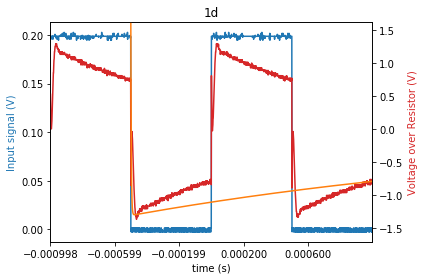

In [9]:
def eq(x):
    x=x+0.000998
    return (2.948*10**-3)*math.exp(-335.0*x)+(-2.99)*math.exp(-34016.0*x)
def eq2(t):
    #return 0
    return calc_over_3(29.96e3,88e-3,99.6e-9,t+0.000499,1.3)
plot_eq("scope_8.csv",eq2,
"1d",flipped=True)

## Part 2
    In part 2 first a over damped response was generated by adjusting a variable resistor. Next an under damped response was generated. The overdamped response was generated with a resistance of 10 kOhms. The under-damped response was generated with a resistance of 2.4 kOhms. The under dampeld and over damped responses are shown below.

t: 0.0005000000000000000104083408558608425664715468883514404296875
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
-0.2310601032905047224660579378
(2, 1998)
t: -0.00049799999999999996179445016508680055267177522182464599609375
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: -0.000497000000000000045907722068250222946517169475555419921875
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: -0.0004959999999999999131805594743127585388720035552978515625
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.0019497081120401926057360

i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.000387999999999999998535893386275574812316335737705230712890625
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.0003890000000000000228428387316625958192162215709686279296875
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.0003899999999999999929396754527743951257434673607349395751953125
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.000391000

i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.0012049999999999999079902668341901517123915255069732666015625
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.0012060000000000000407174294281276161200366914272308349609375
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.00120699999999999995660415752496419372619129717350006103515625
i = ()-0.001281900607553360923244677263e^(-5173.702640015391428675554357*t) + 0.001949708112040192605736059732e^(-22052.43372362097482125687866*t))*2395.90000000000009094947017729282379150390625
t: 0.0012079999999

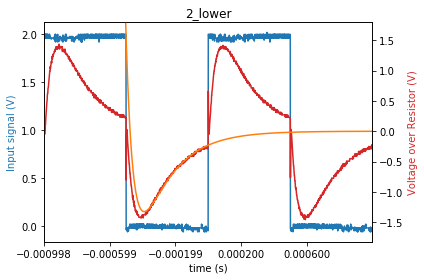

In [10]:
#plot_osc_2_scale("/home/nick/sshfs/Documents/lab07/scope_10.csv","2_lower")
def eq(t):
    return calc_over_3(2395.9,0.088,99.6e-9,t+0.0005,1.6)
    t=t+0.000998
    return 32.1*math.exp(-7936.0*t)*math.sin(7418.0*t)-34.1*math.cos(7418.0*t)
print(eq(0.0))
plot_eq("scope_10.csv",eq,"2_lower",couple=True)

(2, 1998)
t: -0.00049799999999999996179445016508680055267177522182464599609375
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: -0.000497000000000000045907722068250222946517169475555419921875
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: -0.0004959999999999999131805594743127585388720035552978515625
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: -0.00049499999999999999729383137747618093271739780902862548828125
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: -0.0004940000000000000814071032806396033265627920627593994140625
i = ()-0.00023240492086235300493

t: 0.000406000000000000002380040609040179333533160388469696044921875
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.00040700000000000002668698595442720034043304622173309326171875
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.0004079999999999999967838226755389996469602920114994049072265625
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.0004090000000000000210907680209260206538601778447628021240234375
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.00040999999999999999118760474203781996038742363452911376953125
i = ()-0.00023240492086235300493437

t: 0.0012130000000000001024458295972863197675906121730804443359375
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.00121400000000000001833255769412289737374521791934967041015625
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.001214999999999999934219285790959474979899823665618896484375
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.00121600000000000006694644838489693938754498958587646484375
i = ()-0.0002324049208623530049343781671e^(-11888.23071705814735185360198*t) + 0.0003970478515065184802191941755e^(-98543.58746476004087517091060*t))*9718
t: 0.00121699999999999998283317648173351699369959533214569091796875
i = ()-0.0002324049208623530049343781671e^(-11

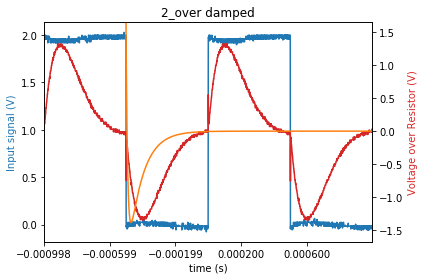

In [11]:

def eq(t):
    #t=t+0.000998
    return calc_over_3(9718,0.088,9.7e-9,t+0.0005,1.6)
    return calc_over(9718,0.088,9.7e-9,t+0.0005)
    return 0.003575*(1043*math.exp(-1043*t)-109388*math.exp(-109388*t))

plot_eq("scope_11.csv",eq,
"2_over damped",couple=True)

## Part 3
An under damped response was generated using a 1kOhm resistor. A plot of the voltage over the resistor is shown below. The response appears to be heavily under damped.

(2, 1998)
[-2.90322854e+01 -2.87954858e+01 -2.85591590e+01 ...  5.34537500e-07
  5.57024171e-07  5.79093383e-07]


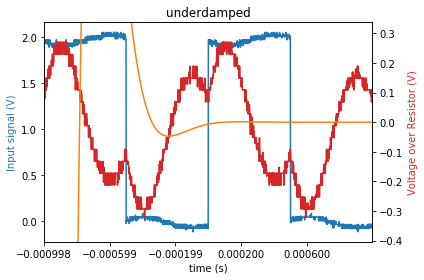

In [32]:
def eq(t):
    return float(under_damped(1398,0.088,99.6e-9,t-0.0002,2.0))
plot_eq("scope_14.csv",eq,"underdamped",couple=True)


# Conclusion